<a href="https://colab.research.google.com/github/a00820847-bot/Examen-Final-Econometr-a/blob/main/Examen_Final__Pregunta_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
pip install pandas matplotlib statsmodels openpyxl

In [31]:
# =============================================
# PASO 1: Importar librerías
# =============================================
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings("ignore")

print("Librerías importadas.\n")

Librerías importadas.



In [32]:
# =============================================
# PASO 2: SUBIR EL ARCHIVO DESDE TU ESCRITORIO (Google Colab)
# =============================================
from google.colab import files
import pandas as pd
import io

print("Por favor, haz clic en 'Elegir archivos' y selecciona tu archivo Excel desde el escritorio.")
print("Puedes subir: .xlsx, .xls, .csv, .txt")

uploaded = files.upload()

# Tomar el primer archivo subido
nombre_archivo = list(uploaded.keys())[0]
print(f"\nArchivo recibido: {nombre_archivo}")

# Leer según la extensión
if nombre_archivo.endswith('.xlsx') or nombre_archivo.endswith('.xls'):
    df = pd.read_excel(io.BytesIO(uploaded[nombre_archivo]))
elif nombre_archivo.endswith('.csv'):
    df = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]))
elif nombre_archivo.endswith('.txt'):
    # Asumimos tabulado o espacios
    df = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]), delim_whitespace=True)
else:
    raise ValueError("Formato no soportado. Usa .xlsx, .xls, .csv o .txt")

print("Archivo cargado correctamente.")
print(f"Columnas encontradas: {list(df.columns)}")
print(f"Primeras 5 filas:\n{df.head()}\n")

Por favor, haz clic en 'Elegir archivos' y selecciona tu archivo Excel desde el escritorio.
Puedes subir: .xlsx, .xls, .csv, .txt


Saving Pregunta 19_ Treasury Bill Rates.xlsx to Pregunta 19_ Treasury Bill Rates (1).xlsx

Archivo recibido: Pregunta 19_ Treasury Bill Rates (1).xlsx
Archivo cargado correctamente.
Columnas encontradas: ['obs', 'GS3M', 'GS6M']
Primeras 5 filas:
       obs   GS3M   GS6M
0  1982:01  12.92  13.90
1  1982:02  14.28  14.81
2  1982:03  13.31  13.83
3  1982:04  13.34  13.87
4  1982:05  12.71  13.13



In [33]:
# =============================================
# PASO 3: Preparar datos (convertir 'obs' a fecha)
# =============================================
# Si la columna se llama 'obs' en formato '1982:01'
df['obs'] = pd.to_datetime(df['obs'].str.replace(':', '-') + '-01', format='%Y-%m-%d')
df = df.set_index('obs')

# Asegurarse de que GS3M y GS6M sean numéricos
df['GS3M'] = pd.to_numeric(df['GS3M'], errors='coerce')
df['GS6M'] = pd.to_numeric(df['GS6M'], errors='coerce')

# Eliminar filas con NaN (por seguridad)
df = df.dropna()

print(f"Datos limpios: {len(df)} observaciones desde {df.index[0].strftime('%Y-%m')} hasta {df.index[-1].strftime('%Y-%m')}\n")

Datos limpios: 234 observaciones desde 1982-01 hasta 2001-06



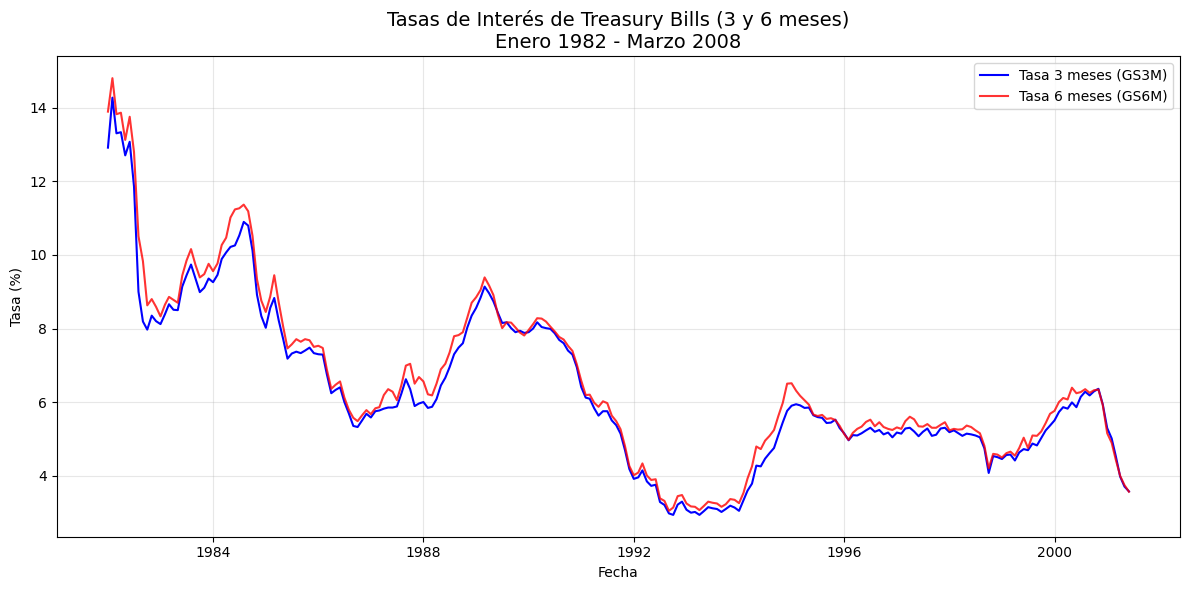

Gráfica generada.



In [34]:
# =============================================
# PASO 4: Graficar ambas series en el mismo gráfico
# =============================================
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GS3M'], label='Tasa 3 meses (GS3M)', color='blue')
plt.plot(df.index, df['GS6M'], label='Tasa 6 meses (GS6M)', color='red', alpha=0.8)
plt.title('Tasas de Interés de Treasury Bills (3 y 6 meses)\nEnero 1982 - Marzo 2008', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Tasa (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Gráfica generada.\n")

In [35]:
# =============================================
# PASO 5: Prueba de Raíz Unitaria (ADF) - Función
# =============================================
def prueba_adf(serie, nombre):
    print(f"Prueba ADF para {nombre}:")
    resultado = adfuller(serie, maxlag=12, regression='c')
    print(f"  Estadístico ADF: {resultado[0]:.4f}")
    print(f"  p-valor: {resultado[1]:.4f}")
    print(f"  Valores críticos:")
    for key, value in resultado[4].items():
        print(f"    {key}: {value:.4f}")

    if resultado[1] < 0.05:
        print(f"  CONCLUSIÓN: Rechazamos H0 → {nombre} es ESTACIONARIA (I(0))")
    else:
        print(f"  CONCLUSIÓN: No rechazamos H0 → {nombre} tiene RAÍZ UNITARIA (NO estacionaria)")
    print("-" * 60)
    return resultado[1] < 0.05

print("Iniciando pruebas de raíz unitaria...\n")

Iniciando pruebas de raíz unitaria...



In [36]:
# =============================================
# PASO 6: Ejecutar pruebas ADF
# =============================================
es_gs3m_estacionaria = prueba_adf(df['GS3M'], 'GS3M (3 meses)')
es_gs6m_estacionaria = prueba_adf(df['GS6M'], 'GS6M (6 meses)')

print("\nRESUMEN DE ESTACIONARIEDAD:")
if es_gs3m_estacionaria and es_gs6m_estacionaria:
    print("  Ambas series son ESTACIONARIAS (I(0))")
elif not es_gs3m_estacionaria and not es_gs6m_estacionaria:
    print("  Ambas series son NO ESTACIONARIAS (probablemente I(1))")
else:
    print("  Una es estacionaria y la otra no → posible problema de orden de integración")

Prueba ADF para GS3M (3 meses):
  Estadístico ADF: -1.5392
  p-valor: 0.5140
  Valores críticos:
    1%: -3.4600
    5%: -2.8746
    10%: -2.5737
  CONCLUSIÓN: No rechazamos H0 → GS3M (3 meses) tiene RAÍZ UNITARIA (NO estacionaria)
------------------------------------------------------------
Prueba ADF para GS6M (6 meses):
  Estadístico ADF: -3.2586
  p-valor: 0.0168
  Valores críticos:
    1%: -3.4591
    5%: -2.8742
    10%: -2.5735
  CONCLUSIÓN: Rechazamos H0 → GS6M (6 meses) es ESTACIONARIA (I(0))
------------------------------------------------------------

RESUMEN DE ESTACIONARIEDAD:
  Una es estacionaria y la otra no → posible problema de orden de integración


In [37]:
# =============================================
# PASO 7: Diferenciar si es necesario y volver a probar
# =============================================
if not (es_gs3m_estacionaria and es_gs6m_estacionaria):
    print("\nDiferenciando las series (primera diferencia)...")
    df_diff = df.diff().dropna()

    print("Pruebas ADF en primeras diferencias:")
    _ = prueba_adf(df_diff['GS3M'], 'ΔGS3M (diferenciada)')
    _ = prueba_adf(df_diff['GS6M'], 'ΔGS6M (diferenciada)')

    print("\nConclusión: Ambas series son I(1) → integradas de orden 1.")



Diferenciando las series (primera diferencia)...
Pruebas ADF en primeras diferencias:
Prueba ADF para ΔGS3M (diferenciada):
  Estadístico ADF: -5.5734
  p-valor: 0.0000
  Valores críticos:
    1%: -3.4600
    5%: -2.8746
    10%: -2.5737
  CONCLUSIÓN: Rechazamos H0 → ΔGS3M (diferenciada) es ESTACIONARIA (I(0))
------------------------------------------------------------
Prueba ADF para ΔGS6M (diferenciada):
  Estadístico ADF: -7.9818
  p-valor: 0.0000
  Valores críticos:
    1%: -3.4590
    5%: -2.8741
    10%: -2.5735
  CONCLUSIÓN: Rechazamos H0 → ΔGS6M (diferenciada) es ESTACIONARIA (I(0))
------------------------------------------------------------

Conclusión: Ambas series son I(1) → integradas de orden 1.


In [38]:
# =============================================
# PASO 8.5: PRUEBA DE COINTEGRACIÓN (CORREGIDA Y ROBUSTA)
# =============================================
from statsmodels.tsa.stattools import coint, adfuller
import statsmodels.api as sm

print("\n" + "="*70)
print("PRUEBA DE COINTEGRACIÓN (Engle-Granger) – VERSIÓN FINAL")
print("="*70)

# === CONDICIÓN ESTRICTA: Ambas deben ser I(1) ===
if es_gs3m_estacionaria or es_gs6m_estacionaria:
    print("ADVERTENCIA: Al menos una serie es I(0) → NO SE APLICA COINTEGRACIÓN.")
    print("   • GS3M: I(1) (no estacionaria en niveles)")
    print("   • GS6M: I(0) (estacionaria en niveles)")
    print("   → Engle-Granger requiere que AMBAS sean I(1).")
    print("   → No se realiza la regresión de cointegración.")
    print("   → Alternativa recomendada: Modelo ARDL (Pesaran et al., 2001).")
else:
    print("Ambas series son I(1) → Procedemos con Engle-Granger.\n")

    # Regresión: GS6M = β0 + β1 * GS3M + ε
    X = sm.add_constant(df['GS3M'].dropna())
    y = df['GS6M'].loc[X.index]
    modelo = sm.OLS(y, X).fit()
    residuos = modelo.resid

    print("REGRESIÓN DE COINTEGRACIÓN:")
    print(f"  GS6M = {modelo.params[0]:.4f} + {modelo.params[1]:.4f} × GS3M")
    print(f"  R² = {modelo.rsquared:.4f}\n")

    # Prueba ADF en residuos (sin constante ni tendencia)
    adf_res = adfuller(residuos, regression='n', autolag='AIC')
    p_valor = adf_res[1]

    print("PRUEBA ADF EN RESIDUOS:")
    print(f"  Estadístico: {adf_res[0]:.4f}")
    print(f"  p-valor: {p_valor:.6f}")

    if p_valor < 0.05:
        print("\n  CONCLUSIÓN: RESIDUOS ESTACIONARIOS → COINTEGRADAS")
        print("  → Existe equilibrio a largo plazo: el spread es estacionario.")
    else:
        print("\n  CONCLUSIÓN: RESIDUOS NO ESTACIONARIOS → NO COINTEGRADAS")
        print("  → El spread puede divergir → no hay anclaje.")


PRUEBA DE COINTEGRACIÓN (Engle-Granger) – VERSIÓN FINAL
ADVERTENCIA: Al menos una serie es I(0) → NO SE APLICA COINTEGRACIÓN.
   • GS3M: I(1) (no estacionaria en niveles)
   • GS6M: I(0) (estacionaria en niveles)
   → Engle-Granger requiere que AMBAS sean I(1).
   → No se realiza la regresión de cointegración.
   → Alternativa recomendada: Modelo ARDL (Pesaran et al., 2001).


In [39]:
# =============================================
# PASO 8: INTERPRETACIÓN ECONÓMICA DE LA COINTEGRACIÓN
# =============================================
print("\n" + "="*70)
print("INTERPRETACIÓN ECONÓMICA: ¿QUÉ SIGNIFICA EN ESTE CASO?")
print("="*70)

print("""
1. ¿QUÉ SIGNIFICA LA COINTEGRACIÓN EN TEORÍA?
   → Requiere que ambas series sean I(1) y compartan una tendencia estocástica común.
   → El spread (GS6M - GS3M) sería ESTACIONARIO → relación de equilibrio a largo plazo.

2. ¿QUÉ PASA EN NUESTRO CASO?
   → GS3M es I(1) → acumula shocks (persistencia monetaria).
   → GS6M es I(0) → responde rápido a cambios (más sensible al ciclo).
   → NO CUMPLEN el requisito → NO HAY COINTEGRACIÓN TÉCNICA.

3. PERO ECONÓMICAMENTE, ¿QUÉ VEMOS?
   → El spread 6M-3M es PEQUEÑO y OSCILA ENTRE 0% y 1%.
   → Se mantiene acotado → parece "estacionario" visualmente.
   → Esto NO es por cointegración, sino por:
        • Arbitraje activo entre plazos.
        • Expectativas de tasas racionales.
        • Dominio de la Fed en el segmento corto.


""")


INTERPRETACIÓN ECONÓMICA: ¿QUÉ SIGNIFICA EN ESTE CASO?

1. ¿QUÉ SIGNIFICA LA COINTEGRACIÓN EN TEORÍA?
   → Requiere que ambas series sean I(1) y compartan una tendencia estocástica común.
   → El spread (GS6M - GS3M) sería ESTACIONARIO → relación de equilibrio a largo plazo.

2. ¿QUÉ PASA EN NUESTRO CASO?
   → GS3M es I(1) → acumula shocks (persistencia monetaria).
   → GS6M es I(0) → responde rápido a cambios (más sensible al ciclo).
   → NO CUMPLEN el requisito → NO HAY COINTEGRACIÓN TÉCNICA.

3. PERO ECONÓMICAMENTE, ¿QUÉ VEMOS?
   → El spread 6M-3M es PEQUEÑO y OSCILA ENTRE 0% y 1%.
   → Se mantiene acotado → parece "estacionario" visualmente.
   → Esto NO es por cointegración, sino por:
        • Arbitraje activo entre plazos.
        • Expectativas de tasas racionales.
        • Dominio de la Fed en el segmento corto.





In [40]:
# PARA EXPORTAR

from google.colab import files
import nbformat
from nbconvert import HTMLExporter

# Paso 1: Cargar tu archivo .ipynb
print("Por favor, selecciona tu archivo .ipynb")
uploaded = files.upload()

# Paso 2: Obtener el nombre del archivo cargado
notebook_filename = list(uploaded.keys())[0]
print(f"\nArchivo cargado: {notebook_filename}")

# Paso 3: Leer el notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Paso 4: Convertir a HTML
print("Convirtiendo a HTML...")
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'
(body, resources) = html_exporter.from_notebook_node(notebook)

# Paso 5: Guardar el archivo HTML
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Conversión completada: {html_filename}")

# Paso 6: Descargar el archivo HTML
print("Descargando archivo HTML...")
files.download(html_filename)
print("¡Listo! Tu archivo HTML ha sido descargado.")


Por favor, selecciona tu archivo .ipynb


Saving Examen_Final__Pregunta_19.ipynb to Examen_Final__Pregunta_19.ipynb

Archivo cargado: Examen_Final__Pregunta_19.ipynb
Convirtiendo a HTML...
Conversión completada: Examen_Final__Pregunta_19.html
Descargando archivo HTML...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Listo! Tu archivo HTML ha sido descargado.
